# Linear regression

* Approxiamtion: $$ \hat{y} = b + wx $$
where:
$$ \hat{y} - estimated\; (predicted)\; value $$
$$ b - constant\; (postion\; on\; y\; axis) $$
$$ w - coefficient\; (slope) $$
$$ x - sample\; data\; for\; independent\; variable $$
<br>

* Cost function:
$$ MSE = J(w, b) = \frac{1}{N}\sum_{i=1}^{n}(y_{i}-\hat{y}) $$
$$ \hat{y} = wx_{i}+b $$

* Update rules:
$$ w=w-\alpha*dw $$
$$ b=b-\alpha*db $$
where:
$$ \alpha - learning\; rate $$

* Derivative:
$$ J'(m, b) = \begin{bmatrix} \frac{df}{dw}\\ \frac{df}{db}\end{bmatrix} = \begin{bmatrix} \frac{1}{N}\sum - 2x_{i}(y_{i}-(wx{i} + b)) \\ \frac{1}{N} \sum - 2(y_{i}-(wx{i} + b)) \end{bmatrix} $$ 
simplified:
$$ \frac{dJ}{dw} = dw = \frac{1}{N}\sum_{i=1}^{n} 2x_{i}(\hat{y} - y_{i}) $$
<br>
$$ \frac{dJ}{db} = db = \frac{1}{N}\sum_{i=1}^{n} 2(\hat{y} - y_{i}) $$

Linear regression is a machine learning algorithm that is used for predicting a continuous target variable, given a set of input features. It is called "linear" because it makes a prediction based on a linear combination of the input features.

The goal of linear regression is to find the line of best fit, which is a line that best describes the relationship between the input features and the target variable. The line of best fit is determined by finding the coefficients (also known as weights or parameters) for the input features that minimize the error between the predicted values and the actual values.

To perform linear regression, you need a dataset with a set of input features and a continuous target variable. You can then use a variety of techniques, such as gradient descent or least squares optimization, to find the optimal coefficients for the input features. Once you have found the optimal coefficients, you can use the linear regression model to make predictions on new data by plugging in the input features and using the learned coefficients to predict the target variable.

Linear regression is a simple and widely used machine learning algorithm that is well-suited for problems with a linear relationship between the input features and the target variable. It is a good choice for many applications, including predicting prices, demand, or other continuous variables.

## numpy

###very detailed

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

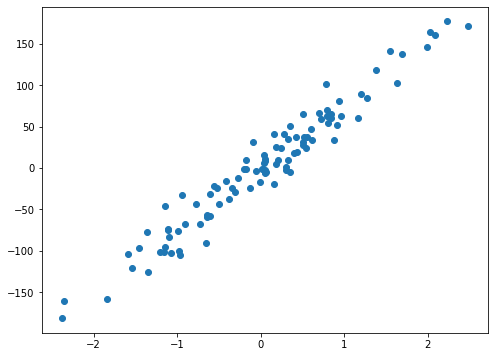

In [ ]:
# Some sample data from sklearn

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y)
plt.show()

In [ ]:
print(X_train.shape)
print(y_train.shape)

(80, 1)
(80,)


In [ ]:
# init parameters
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0
n_itters = 1000
learning_rate = 0.01

In [ ]:
# fitting

for _ in range(n_itters):
   y_predicted = np.dot(X_train, weights) + bias
  # scaling factor 2 for derivative can be omitted
   dw = (1/ n_samples) * np.dot(X_train.T, (y_predicted - y_train))

   db = (1/ n_samples) * np.sum(y_predicted - y_train)

   weights -= learning_rate * dw
   bias -= learning_rate * db


In [ ]:
# predict

y_predicted = np.dot(X_test, weights) + bias

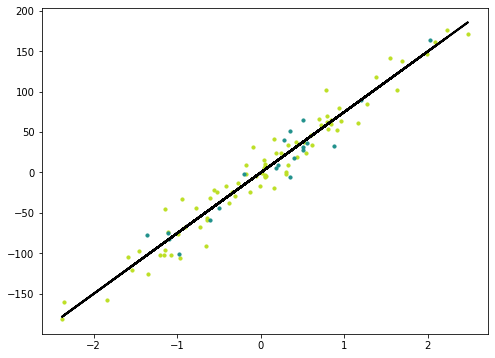

In [ ]:
# visualising

y_pred_line = np.dot(X, weights) + bias
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color="black", linewidth=2, label="Predictions")
plt.show()

In [ ]:
# mean squared error

mean_squared_error = np.mean((y_test - y_predicted) ** 2)
print(f"mean_squared_error = {mean_squared_error}")

# r-squared shows variability of model explained by regression model
corr_matrix = np.corrcoef(y_test, y_predicted)
r2_score = corr_matrix[0, 1]
print(f"r2_score = {r2_score**2}")

mean_squared_error = 305.7719958301902
r2_score = 0.9253717934621964


### clean version

In [ ]:
import numpy as np

In [ ]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

MSE: 305.7719958301902
Accuracy: 0.9253717934621964


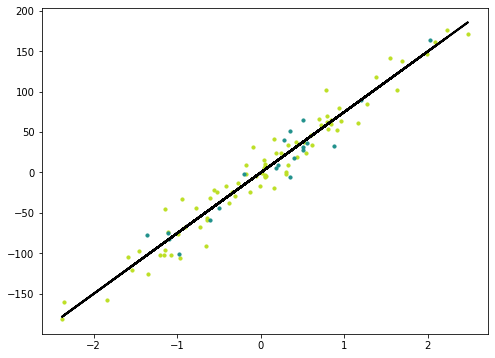

In [ ]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

## sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_hat = regressor.predict(X_test)


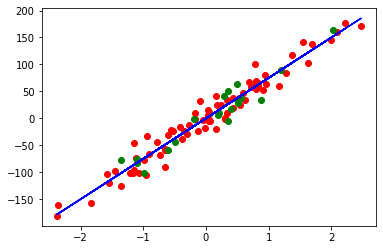

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

In [ ]:
mean_squared_error = np.mean((y_test - y_predicted) ** 2)
print(f"mean_squared_error = {mean_squared_error}")
r2_score = regressor.score(X_test, y_test)
print(f"r2_score = {r2_score}")

mean_squared_error = 305.7719958301902
r2_score = 0.9247515208302274
